In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from PIL import Image
import csv

In [36]:
train_df = pd.read_csv('./data/sign_mnist_train.csv')
test_df = pd.read_csv('./data/sign_mnist_test.csv')

In [51]:
y_train = train_df['label'].copy()
y_test = test_df['label'].copy()

In [52]:
y_train.nunique() # number of alpha bets excluding J and Z which require motion

24

In [37]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [49]:
balance_check = train_df['label'].value_counts()

<Axes: xlabel='label', ylabel='count'>

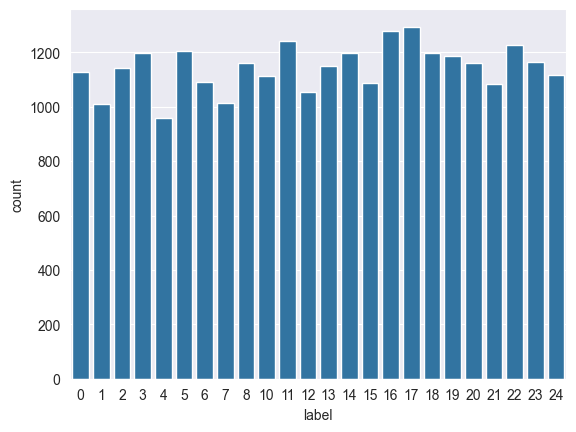

In [50]:
# checking if the data set is balanced.
sns.barplot(balance_check)

In [53]:
del train_df['label']
del test_df['label']

In [56]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [63]:
x_train = train_df.values
x_test = test_df.values

Normalizing pixel values to reduce effect of illuminations differences and to converge model faster.

In [64]:
x_train = x_train/255
x_test = x_test/255

In [71]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))